In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential, Model, load_model
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanAbsoluteError
import json

In [2]:
fldr = "jangedoo/utkface-new/versions/1/UTKFace"

In [3]:
files = os.listdir(fldr)

In [4]:
ages = []
genders = []
images = []

In [ ]:
for f in files:
    age = int(f.split('_')[0])
    ages.append(age)
    gender = int(f.split('_')[1])
    genders.append(gender)
    image = cv2.imread(fldr + '/' + f)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (48, 48))
    images.append(image)

In [6]:
images_f  = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

In [7]:
# Defining labels for the model

labels = []
i = 0
while i < len(ages_f):
    label = []
    label.append(ages_f[i])
    label.append(genders_f[i])
    labels.append(label)
    i += 1

In [8]:
labels_f = np.array(labels)

In [9]:
# Creating another list of images with the pixel values scaled between 0 and 1

images_f_2 = images_f / 255.0

In [10]:
X_train, X_test, y_train, y_test = train_test_split(images_f_2, labels_f, test_size=0.25, random_state=42)

In [11]:
y_train_2=[y_train[:,1],y_train[:,0]]
y_test_2=[y_test[:,1],y_test[:,0]]

In [12]:
# loading the model

custom_objects = {'mae': MeanAbsoluteError()}

In [13]:
model = load_model('Age_Gender_Detection.h5', custom_objects=custom_objects)

In [14]:
# Recompile with the same optimizer, loss, and metrics used during training
model.compile(optimizer='adam', loss=['binary_crossentropy', 'mae'], metrics=['accuracy', 'accuracy'])

In [15]:
model.evaluate(X_test, y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - age_out_accuracy: 0.0487 - age_out_loss: 6.4919 - gender_out_accuracy: 0.8975 - gender_out_loss: 0.2319 - loss: 7.5320


[7.607919216156006,
 0.24223196506500244,
 6.548908710479736,
 0.047410156577825546,
 0.8940442204475403]

In [16]:
preds = model.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [17]:
preds[1]

array([[ 6.832266],
       [51.934193],
       [22.525295],
       ...,
       [68.91166 ],
       [23.23995 ],
       [47.37592 ]], shape=(5927, 1), dtype=float32)

In [18]:
# Load JSON history
with open("training_history.json", "r") as f:
    history = json.load(f)

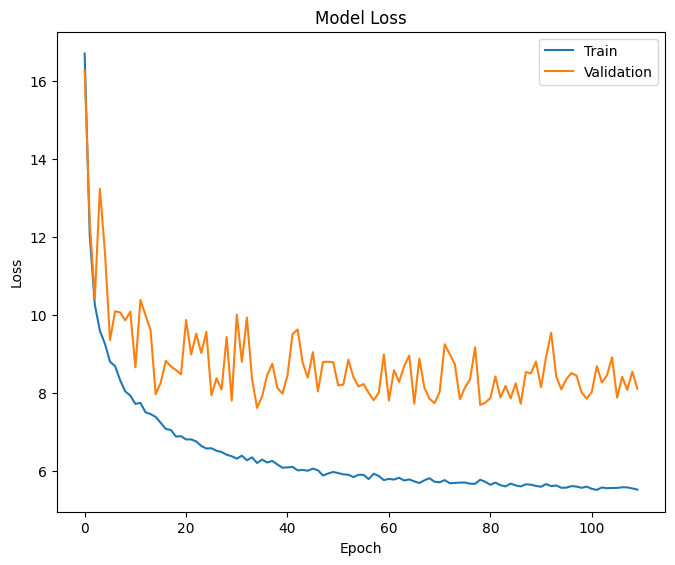

In [19]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.subplots_adjust(left=0, right=0.95, top=1, bottom=0, hspace=0.25, wspace=0.35)

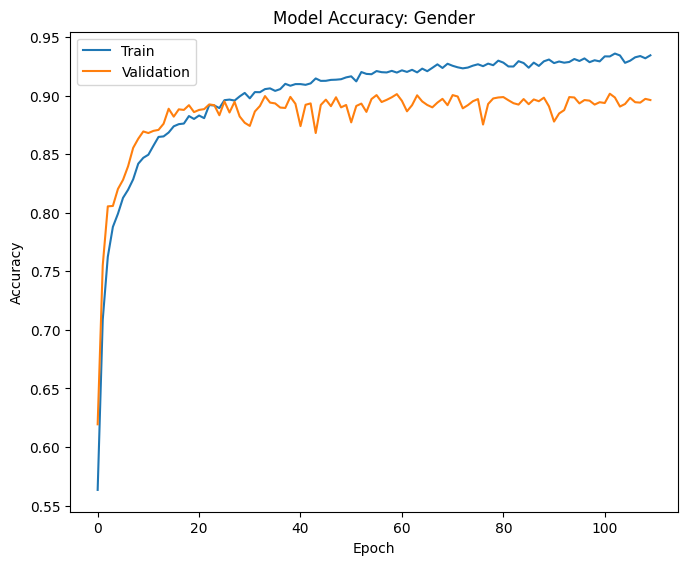

In [20]:
plt.plot(history['gender_out_accuracy'])
plt.plot(history['val_gender_out_accuracy'])
plt.title('Model Accuracy: Gender')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(left=0, right=0.95, top=1, bottom=0, hspace=0.25, wspace=0.35)

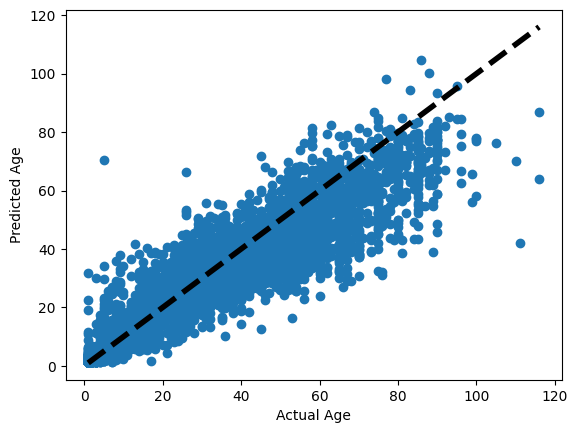

In [21]:
fig, ax = plt.subplots()
ax.scatter(y_test_2[1], preds[1])
ax.plot([y_test_2[1].min(), y_test_2[1].max()], [y_test_2[1].min(), y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [22]:
i = 0
pred_l = []
while i < len(preds[0]):
    pred_l.append(int(np.round(preds[0][i])))
    i += 1

/var/folders/9r/s9z4twjj33v1skc12jtnvrkh0000gn/T/ipykernel_12535/334712157.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_l.append(int(np.round(preds[0][i])))


In [26]:
report = classification_report(y_test_2[0], pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      3114
           1       0.86      0.92      0.89      2813

    accuracy                           0.89      5927
   macro avg       0.89      0.90      0.89      5927
weighted avg       0.90      0.89      0.89      5927



<Axes: >

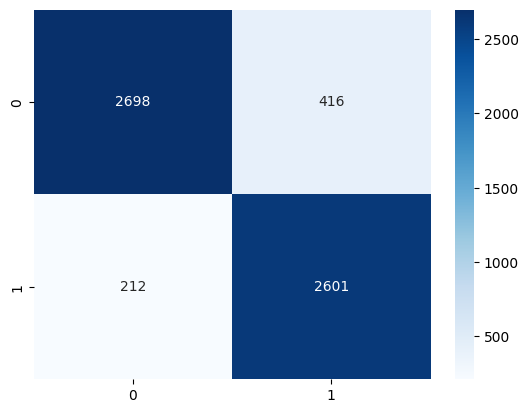

In [31]:
sns.heatmap(confusion_matrix(y_test_2[0], pred_l), annot=True, fmt='d', cmap='Blues')

In [39]:
def test_image(index, images_f, images_f_2, model):
    plt.imshow(images_f[index])
    image_test = images_f_2[index].reshape(1, 48, 48, 3)
    pred_l = model.predict(np.array(image_test))
    gender_f = ['Male', 'Female']
    age_f = int(np.round(pred_l[1][0]))
    gender = int(np.round(pred_l[0][0]))
    print('Predicted Age: ', age_f, '\n', 'Predicted Gender: ', gender_f[gender])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Age:  1 
 Predicted Gender:  Female


/var/folders/9r/s9z4twjj33v1skc12jtnvrkh0000gn/T/ipykernel_12535/466265746.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age_f = int(np.round(pred_l[1][0]))
/var/folders/9r/s9z4twjj33v1skc12jtnvrkh0000gn/T/ipykernel_12535/466265746.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gender = int(np.round(pred_l[0][0]))


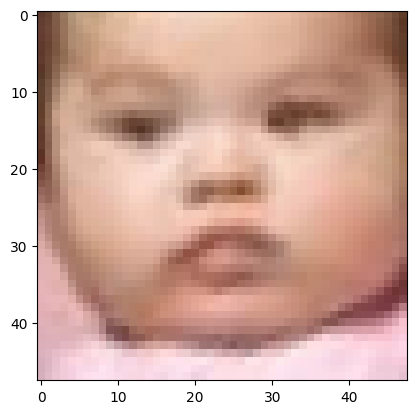

In [40]:
test_image(4, images_f, images_f_2, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Age:  21 
 Predicted Gender:  Female


/var/folders/9r/s9z4twjj33v1skc12jtnvrkh0000gn/T/ipykernel_12535/466265746.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age_f = int(np.round(pred_l[1][0]))
/var/folders/9r/s9z4twjj33v1skc12jtnvrkh0000gn/T/ipykernel_12535/466265746.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gender = int(np.round(pred_l[0][0]))


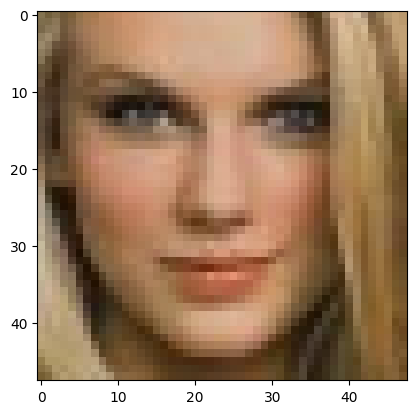

In [41]:
test_image(23, images_f, images_f_2, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Age:  6 
 Predicted Gender:  Female


/var/folders/9r/s9z4twjj33v1skc12jtnvrkh0000gn/T/ipykernel_12535/466265746.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age_f = int(np.round(pred_l[1][0]))
/var/folders/9r/s9z4twjj33v1skc12jtnvrkh0000gn/T/ipykernel_12535/466265746.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gender = int(np.round(pred_l[0][0]))


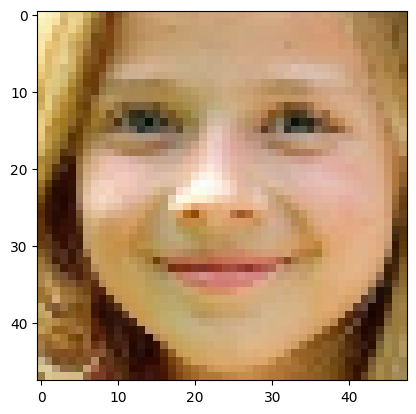

In [42]:
test_image(88, images_f, images_f_2, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Age:  39 
 Predicted Gender:  Female


/var/folders/9r/s9z4twjj33v1skc12jtnvrkh0000gn/T/ipykernel_12535/466265746.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age_f = int(np.round(pred_l[1][0]))
/var/folders/9r/s9z4twjj33v1skc12jtnvrkh0000gn/T/ipykernel_12535/466265746.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gender = int(np.round(pred_l[0][0]))


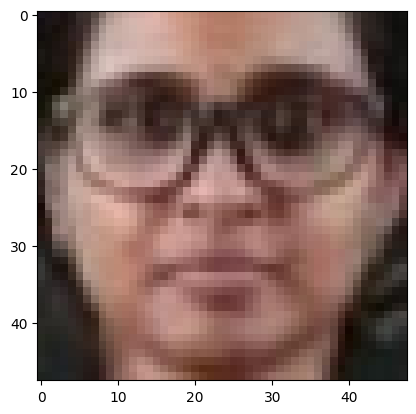

In [43]:
test_image(1288, images_f, images_f_2, model)